In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

In [11]:
dfh = pd.read_csv('./data/[1h]BTCUSDT.csv')
dfm = pd.read_csv('./data/[1m]BTCUSDT.csv')

In [12]:
dfh['Start'] = pd.to_datetime(dfh['Start'].to_numpy(), unit='ms')
dfh['Stop'] = pd.to_datetime(dfh['Stop'].to_numpy(), unit='ms')

dfm['Start'] = pd.to_datetime(dfm['Start'].to_numpy(), unit='ms')
dfm['Stop'] = pd.to_datetime(dfm['Stop'].to_numpy(), unit='ms')

In [13]:
display(dfh)
display(dfm)

,Start,Stop,Open,Close,Low,High,Volume
0,2017-08-17 04:00:00,2017-08-17 04:59:59.999,4261.48,4308.83,4261.32,4313.62,47.181009
1,2017-08-17 05:00:00,2017-08-17 05:59:59.999,4308.83,4315.32,4291.37,4328.69,23.234916
2,2017-08-17 06:00:00,2017-08-17 06:59:59.999,4330.29,4324.35,4309.37,4345.45,7.229691
3,2017-08-17 07:00:00,2017-08-17 07:59:59.999,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,2017-08-17 08:59:59.999,4333.32,4360.69,4333.32,4377.85,0.972807
...,...,...,...,...,...,...,...
29471,2020-12-31 20:00:00,2020-12-31 20:59:59.999,28897.84,29126.70,28862.00,29139.65,1936.480299
29472,2020-12-31 21:00:00,2020-12-31 21:59:59.999,29126.71,28966.36,28900.79,29169.55,2524.473111
29473,2020-12-31 22:00:00,2020-12-31 22:59:59.999,28966.36,29100.84,28910.19,29143.73,1438.506326
29474,2020-12-31 23:00:00,2020-12-31 23:59:59.999,29100.83,28923.63,28780.00,29110.35,1976.419299


,Start,Stop,Open,Close,Low,High,Volume
0,2017-08-17 04:00:00,2017-08-17 04:00:59.999,4261.48,4261.48,4261.48,4261.48,1.775183
1,2017-08-17 04:01:00,2017-08-17 04:01:59.999,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:02:00,2017-08-17 04:02:59.999,4280.56,4280.56,4280.56,4280.56,0.261074
3,2017-08-17 04:03:00,2017-08-17 04:03:59.999,4261.48,4261.48,4261.48,4261.48,0.012008
4,2017-08-17 04:04:00,2017-08-17 04:04:59.999,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...,...,...
1767788,2020-12-31 23:56:00,2020-12-31 23:56:59.999,28978.91,28975.06,28969.99,28988.06,19.086172
1767789,2020-12-31 23:57:00,2020-12-31 23:57:59.999,28975.06,28975.03,28955.35,28981.41,21.327772
1767790,2020-12-31 23:58:00,2020-12-31 23:58:59.999,28975.03,28923.67,28923.15,28977.10,36.070975
1767791,2020-12-31 23:59:00,2020-12-31 23:59:59.999,28923.66,28923.63,28903.86,28952.28,51.895343


In [14]:
x = dfm['Stop']
y = dfm['Close']

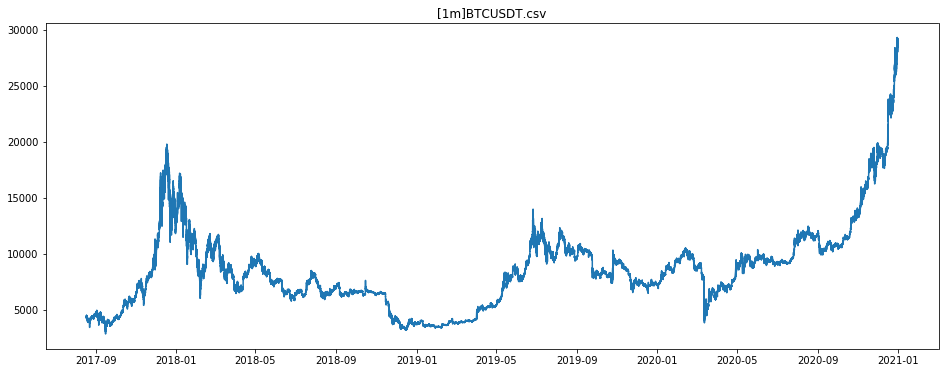

In [15]:
plt.figure(figsize=(16, 6))
plt.plot(x, y)
plt.title('[1m]BTCUSDT.csv')
plt.show()

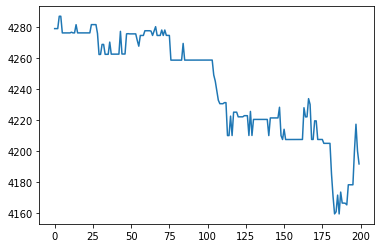

In [16]:
X = y[33400:33600].to_numpy()
plt.plot(X);

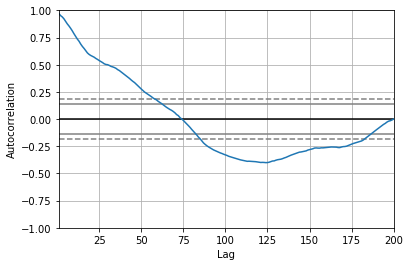

In [17]:
autocorrelation_plot(X)
plt.show()

# Autoregressive Moving Average (ARMA)

predicted=4210.594653059191, expected=4214.05, error=3.4553469408092496
predicted=4213.107599882875, expected=4207.46, error=5.6475998828746015
predicted=4209.6851002153335, expected=4207.47, error=2.215100215333223
predicted=4208.468742463891, expected=4207.49, error=0.9787424638916491
predicted=4208.05395772317, expected=4207.49, error=0.5639577231704607
predicted=4207.905964667861, expected=4207.49, error=0.4159646678608624
predicted=4207.851572586991, expected=4207.49, error=0.3615725869913149
predicted=4207.829449122158, expected=4207.49, error=0.3394491221579301
predicted=4207.819176594138, expected=4207.49, error=0.3291765941385165
predicted=4207.813040371337, expected=4207.49, error=0.32304037133690144
predicted=4207.808279371168, expected=4207.49, error=0.3182793711685008
predicted=4207.804256527083, expected=4207.49, error=0.31425652708367124
predicted=4207.800584219812, expected=4207.49, error=0.3105842198119717
predicted=4207.796989356255, expected=4227.9, error=20.10301064

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=4176.774456592554, expected=4159.65, error=17.124456592554452
predicted=4163.102297105485, expected=4161.0, error=2.102297105485377
predicted=4161.700577100287, expected=4171.73, error=10.0294228997127
predicted=4170.046570279492, expected=4159.64, error=10.406570279491461
predicted=4162.191458489427, expected=4173.68, error=11.488541510573668
predicted=4171.349517286078, expected=4166.6, error=4.749517286077207
predicted=4168.017821295049, expected=4166.6, error=1.4178212950482703
predicted=4167.2308190578915, expected=4166.5, error=0.7308190578914946
predicted=4166.9609728988835, expected=4165.46, error=1.5009728988834468
predicted=4166.1004726949295, expected=4178.37, error=12.269527305070369
predicted=4175.731256728113, expected=4178.37, error=2.6387432718865966
predicted=4178.089349643463, expected=4178.37, error=0.28065035653708037
predicted=4178.626652831681, expected=4178.37, error=0.25665283168109454
predicted=4178.749882223063, expected=4200.12, error=21.37011777693

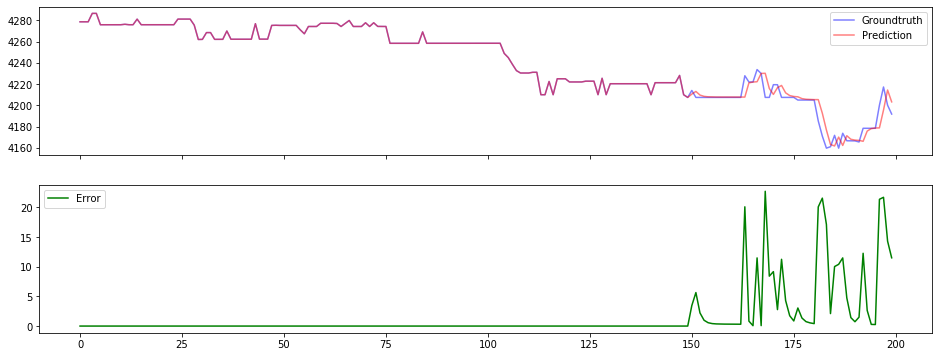

In [18]:
# initial training size
size = len(X) - 50
train, test = X[0:size], X[size:len(X)]

history = train.tolist()
predictions = train.tolist()
errors = [0] * len(history)

for t in range(len(test)):
    p, d, q = 1, 0, 1
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()
    
    prediction = model_fit.forecast()[0]
    predictions.append(prediction)
    
    true = test[t]
    history.append(true)
    
    # error
    error = np.abs(true - prediction)
    errors.append(error)
    
    print('predicted={}, expected={}, error={}'.format(prediction, true, error))
    
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(history, predictions))
print('Test RMSE: %.3f' % rmse)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

ax1.plot(history, color='blue', label='Groundtruth', alpha=0.5)
ax1.plot(predictions, color='red', label='Prediction', alpha=0.5)
ax1.legend()

ax2.plot(errors, color='green', label='Error')
ax2.legend()

plt.show()

# Autoregressive Integrated Moving Average (ARIMA)

predicted=4210.222073665824, expected=4214.05, error=3.8279263341764818
predicted=4212.7735658476095, expected=4207.46, error=5.313565847609425
predicted=4209.375878907662, expected=4207.47, error=1.905878907661645
predicted=4208.091038110443, expected=4207.49, error=0.6010381104433691
predicted=4207.684306489449, expected=4207.49, error=0.1943064894494455
predicted=4207.55321980453, expected=4207.49, error=0.06321980453049036
predicted=4207.510606669957, expected=4207.49, error=0.02060666995748761
predicted=4207.496720222152, expected=4207.49, error=0.006720222152580391
predicted=4207.492191945196, expected=4207.49, error=0.0021919451965004555
predicted=4207.490715015279, expected=4207.49, error=0.0007150152796384646
predicted=4207.490233256967, expected=4207.49, error=0.00023325696747633629
predicted=4207.490076100405, expected=4207.49, error=7.610040483996272e-05
predicted=4207.490024829728, expected=4207.49, error=2.482972831785446e-05
predicted=4207.490008101975, expected=4227.9, 

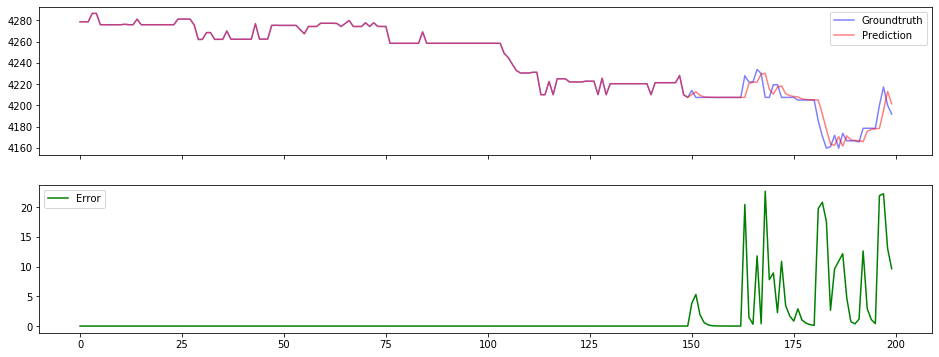

In [19]:
# initial training size
size = len(X) - 50
train, test = X[0:size], X[size:len(X)]

history = train.tolist()
predictions = train.tolist()
errors = [0] * len(history)

for t in range(len(test)):
    p, d, q = 1, 1, 1
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()
    
    prediction = model_fit.forecast()[0]
    predictions.append(prediction)
    
    true = test[t]
    history.append(true)
    
    # error
    error = np.abs(true - prediction)
    errors.append(error)
    
    print('predicted={}, expected={}, error={}'.format(prediction, true, error))
    
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(history, predictions))
print('Test RMSE: %.3f' % rmse)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

ax1.plot(history, color='blue', label='Groundtruth', alpha=0.5)
ax1.plot(predictions, color='red', label='Prediction', alpha=0.5)
ax1.legend()

ax2.plot(errors, color='green', label='Error')
ax2.legend()

plt.show()

# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [20]:
# initial training size
size = len(X) - 50
train, test = X[0:size], X[size:len(X)]

history = train.tolist()
predictions = train.tolist()
errors = [0] * len(history)

for t in range(len(test)):
    p, d, q = 1, 1, 1
    P, D, Q, s = 0, 0, 0, 2
    print('Creating model...')
    model = SARIMAX(y, order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_fit = model.fit()
    
    prediction = model_fit.forecast()[0]
    predictions.append(prediction)
    
    true = test[t]
    history.append(true)
    
    # error
    error = np.abs(true - prediction)
    errors.append(error)
    
    print('predicted={}, expected={}, error={}'.format(prediction, true, error))
    
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(history, predictions))
print('Test RMSE: %.3f' % rmse)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

ax1.plot(history, color='blue', label='Groundtruth', alpha=0.5)
ax1.plot(predictions, color='red', label='Prediction', alpha=0.5)
ax1.legend()

ax2.plot(errors, color='green', label='Error')
ax2.legend()

plt.show()

Creating model...


KeyboardInterrupt: 

# Results

ARMA and ARIMA are very similar Time Series forecasting models, both are showing great performance and accuracy.  
SARIMA is more difficult model than ARMA and ARIMA, although it is a big model that is much more slower.  